# Telecom Churn Prediction Case Study

### Problem Statment:

We have a telecom firm which has collected data of all its customers. The main types of attributes are:

Demographics (age, gender etc.)   
Services availed (internet packs purchased, special offers taken etc.)   
Expenses (amount of recharge done per month etc.)   
 
Based on all this past information, we want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not. So the variable of interest, i.e. the target variable here is `Churn` which will tell us whether or not a particular customer has churned. It is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.

## Logistic Regression

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
cd=pd.read_csv('D:\Machine_learning and AI\MachineLearning 1\Telecom crun Case Study\Churn_data.csv')
cd

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
cu_d=pd.read_csv('D:\Machine_learning and AI\MachineLearning 1\Telecom crun Case Study\Customer_data.csv')
cu_d

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [4]:
int_d=pd.read_csv('D:\Machine_learning and AI\MachineLearning 1\Telecom crun Case Study\Internet_data.csv')
int_d

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [5]:
#Merging all the above data into a master dataframe:
df0=pd.merge(cd,cu_d,how='inner',on='customerID')
df=pd.merge(df0,int_d,how='inner',on='customerID')
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [7]:
# Continuous variables:
cont=df[['tenure','MonthlyCharges','TotalCharges']]
cont

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.5
7039,72,103.20,7362.9
7040,11,29.60,346.45
7041,4,74.40,306.6


In [8]:
# Categorical variables:
cat=df.drop(cont,axis=1)
cat=cat.drop('customerID',axis=1)
cat

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Month-to-month,Yes,Electronic check,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,One year,No,Mailed check,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,No,One year,No,Bank transfer (automatic),No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,One year,Yes,Mailed check,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,Yes,One year,Yes,Credit card (automatic),No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,No,Month-to-month,Yes,Electronic check,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,Yes,Month-to-month,Yes,Mailed check,Yes,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [9]:
# Replacing Yes and No with 1 and 0 respectively:
df=df.replace({'Yes':1,'No':0})
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,0,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,0,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,Fiber optic,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.5,0,Male,...,1,1,1,DSL,1,0,1,1,1,1
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.9,0,Female,...,1,1,1,Fiber optic,0,1,1,0,1,1
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,...,1,1,No phone service,DSL,1,0,0,0,0,0
7041,8361-LTMKD,4,1,Month-to-month,1,Mailed check,74.40,306.6,1,Male,...,1,0,1,Fiber optic,0,0,0,0,0,0


In [10]:
# Since the information contained in PhoneService column was already present in MultipleLines Column as 'NO phone service', we drop it:
df=df.drop('PhoneService',axis=1)
df

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,0,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,0,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,1,0,1,1,0,0
4,9237-HQITU,2,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,0,Fiber optic,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,One year,1,Mailed check,84.80,1990.5,0,Male,0,1,1,1,DSL,1,0,1,1,1,1
7039,2234-XADUH,72,One year,1,Credit card (automatic),103.20,7362.9,0,Female,0,1,1,1,Fiber optic,0,1,1,0,1,1
7040,4801-JZAZL,11,Month-to-month,1,Electronic check,29.60,346.45,0,Female,0,1,1,No phone service,DSL,1,0,0,0,0,0
7041,8361-LTMKD,4,Month-to-month,1,Mailed check,74.40,306.6,1,Male,1,1,0,1,Fiber optic,0,0,0,0,0,0


In [11]:
# Creating dummy variables:
df=pd.get_dummies(data=df,columns=['Contract','PaymentMethod','MultipleLines','InternetService'],drop_first=True)
df

,customerID,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic
0,7590-VHVEG,1,1,29.85,29.85,0,Female,0,1,0,...,0,0,0,0,1,0,0,1,1,0
1,5575-GNVDE,34,0,56.95,1889.5,0,Male,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,3668-QPYBK,2,1,53.85,108.15,1,Male,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,7795-CFOCW,45,0,42.30,1840.75,0,Male,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,9237-HQITU,2,1,70.70,151.65,1,Female,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,84.80,1990.5,0,Male,0,1,1,...,1,1,0,0,0,1,1,0,1,0
7039,2234-XADUH,72,1,103.20,7362.9,0,Female,0,1,1,...,1,1,0,1,0,0,1,0,0,1
7040,4801-JZAZL,11,1,29.60,346.45,0,Female,0,1,1,...,0,0,0,0,1,0,0,1,1,0
7041,8361-LTMKD,4,1,74.40,306.6,1,Male,1,1,0,...,0,0,0,0,0,1,1,0,0,1


In [12]:
df=pd.get_dummies(data=df,columns=['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies'])
df=df.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1)
df

,customerID,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
0,7590-VHVEG,1,1,29.85,29.85,0,Female,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,0,56.95,1889.5,0,Male,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,53.85,108.15,1,Male,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,42.30,1840.75,0,Male,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,70.70,151.65,1,Female,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,84.80,1990.5,0,Male,0,1,1,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,103.20,7362.9,0,Female,0,1,1,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,1,29.60,346.45,0,Female,0,1,1,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,74.40,306.6,1,Male,1,1,0,...,1,0,1,0,1,0,1,0,1,0


In [13]:
df.gender=df.gender.replace({'Male':1,'Female':0})
df

,customerID,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
0,7590-VHVEG,1,1,29.85,29.85,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,0,56.95,1889.5,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,53.85,108.15,1,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,42.30,1840.75,0,1,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,70.70,151.65,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,84.80,1990.5,0,1,0,1,1,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,103.20,7362.9,0,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,1,29.60,346.45,0,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,74.40,306.6,1,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0


In [14]:
df.set_index('customerID',drop=True,inplace=True)

In [15]:
df

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,1,29.85,29.85,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
5575-GNVDE,34,0,56.95,1889.5,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
3668-QPYBK,2,1,53.85,108.15,1,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
7795-CFOCW,45,0,42.30,1840.75,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
9237-HQITU,2,1,70.70,151.65,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,84.80,1990.5,0,1,0,1,1,1,...,1,0,0,1,0,1,0,1,0,1
2234-XADUH,72,1,103.20,7362.9,0,0,0,1,1,1,...,0,1,0,1,1,0,0,1,0,1
4801-JZAZL,11,1,29.60,346.45,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0


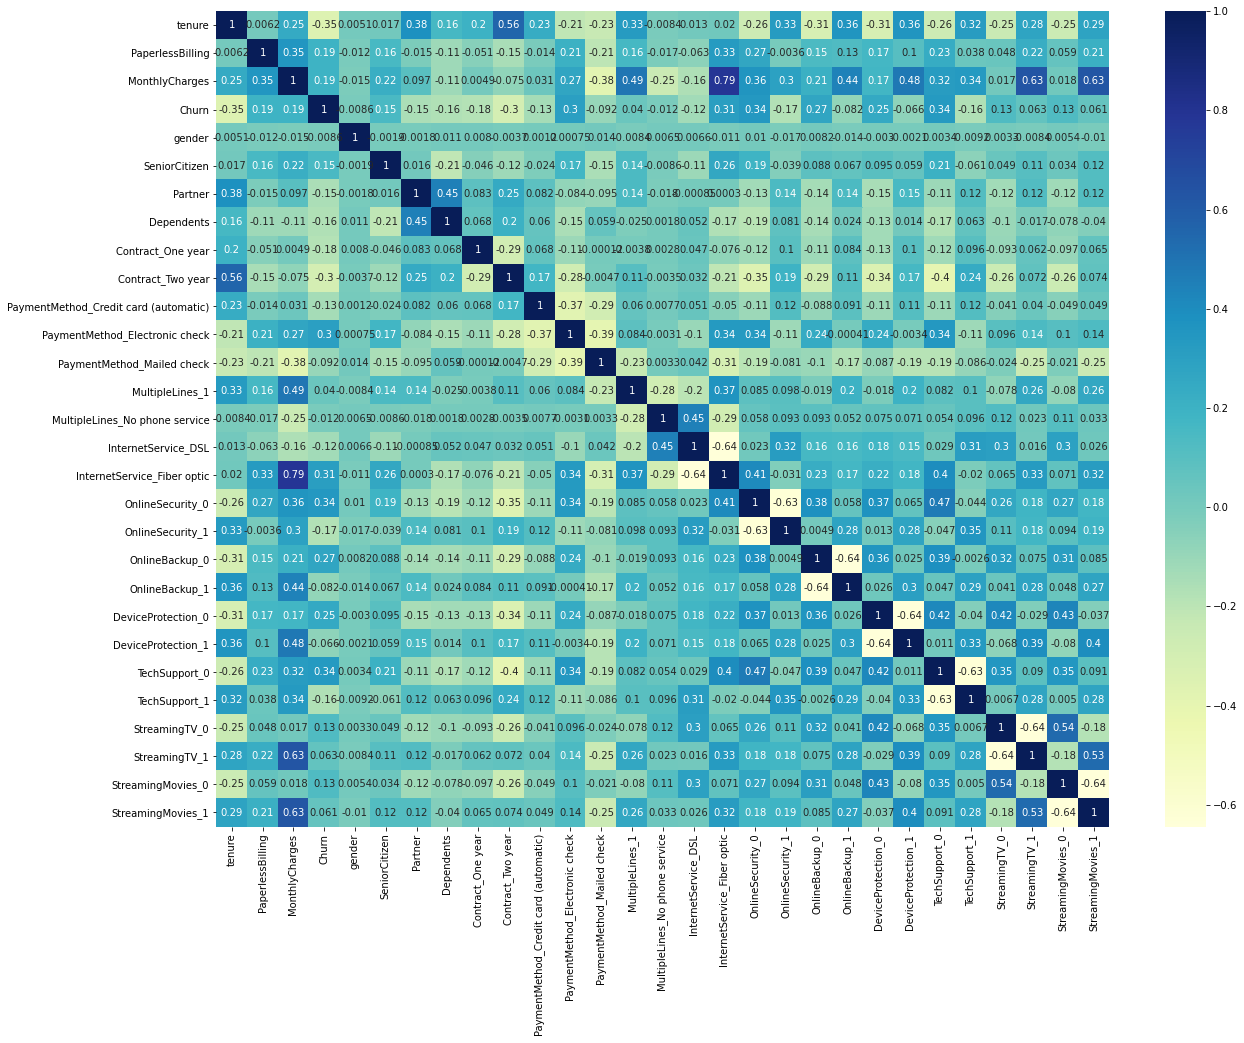

In [16]:
# Plotting correlation using heatmap:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [17]:
sum(df.TotalCharges==' ')

11

In [18]:
df=df[~(df.TotalCharges==' ')]
df

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,1,29.85,29.85,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
5575-GNVDE,34,0,56.95,1889.5,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
3668-QPYBK,2,1,53.85,108.15,1,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
7795-CFOCW,45,0,42.30,1840.75,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
9237-HQITU,2,1,70.70,151.65,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,84.80,1990.5,0,1,0,1,1,1,...,1,0,0,1,0,1,0,1,0,1
2234-XADUH,72,1,103.20,7362.9,0,0,0,1,1,1,...,0,1,0,1,1,0,0,1,0,1
4801-JZAZL,11,1,29.60,346.45,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0


In [19]:
df.TotalCharges=df.TotalCharges.astype('float')
df.TotalCharges

customerID
7590-VHVEG      29.85
5575-GNVDE    1889.50
3668-QPYBK     108.15
7795-CFOCW    1840.75
9237-HQITU     151.65
               ...   
6840-RESVB    1990.50
2234-XADUH    7362.90
4801-JZAZL     346.45
8361-LTMKD     306.60
3186-AJIEK    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

## Model Building

In [20]:
# train-test split:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
df_train

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
customerID,,,,,,,,,,,,,,,,,,,,,
9342-VNIMQ,33,1,54.65,1665.20,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
0980-PVMRC,40,1,50.85,2036.55,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
0742-NXBGR,1,1,82.30,82.30,1,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
9851-KIELU,10,1,110.10,1043.30,1,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
7295-JOMMD,4,1,98.10,396.30,1,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887-PBQAO,45,1,25.90,1216.60,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1729-VLAZJ,10,0,40.25,411.45,0,0,0,0,1,1,...,0,1,1,0,0,1,1,0,1,0
9782-LGXMC,49,0,61.75,3024.15,0,0,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0


In [21]:
scaler=StandardScaler()

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 9342-VNIMQ to 6147-CBCRA
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4922 non-null   int64  
 1   PaperlessBilling                       4922 non-null   int64  
 2   MonthlyCharges                         4922 non-null   float64
 3   TotalCharges                           4922 non-null   float64
 4   Churn                                  4922 non-null   int64  
 5   gender                                 4922 non-null   int64  
 6   SeniorCitizen                          4922 non-null   int64  
 7   Partner                                4922 non-null   int64  
 8   Dependents                             4922 non-null   int64  
 9   Contract_One year                      4922 non-null   uint8  
 10  Contract_Two year                      4922 non-null   uint8  

In [23]:
cont.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [24]:
var=['tenure', 'MonthlyCharges', 'TotalCharges']
df_train[var]=scaler.fit_transform(df_train[var])
df_train

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
customerID,,,,,,,,,,,,,,,,,,,,,
9342-VNIMQ,0.019693,1,-0.338074,-0.276449,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
0980-PVMRC,0.305384,1,-0.464443,-0.112702,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
0742-NXBGR,-1.286319,1,0.581425,-0.974430,1,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
9851-KIELU,-0.919003,1,1.505913,-0.550676,1,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
7295-JOMMD,-1.163880,1,1.106854,-0.835971,1,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887-PBQAO,0.509448,1,-1.294154,-0.474260,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1729-VLAZJ,-0.919003,0,-0.816946,-0.829291,0,0,0,0,1,1,...,0,1,1,0,0,1,1,0,1,0
9782-LGXMC,0.672699,0,-0.101964,0.322781,0,0,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0


In [25]:
df_train[var].describe()

,tenure,MonthlyCharges,TotalCharges
count,4.922000e+03,4.922000e+03,4.922000e+03
mean,1.229793e-16,-2.053980e-16,1.221426e-16
std,1.000102e+00,1.000102e+00,1.000102e+00
min,-1.286319e+00,-1.548555e+00,-1.002408e+00
25%,-9.598159e-01,-9.665930e-01,-8.344722e-01
50%,-1.435582e-01,1.823658e-01,-3.877341e-01
75%,9.583897e-01,8.341630e-01,6.589888e-01
max,1.611396e+00,1.793569e+00,2.818847e+00


In [26]:
y_train=df_train.pop('Churn')
X_train=df_train
X_train

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
customerID,,,,,,,,,,,,,,,,,,,,,
9342-VNIMQ,0.019693,1,-0.338074,-0.276449,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
0980-PVMRC,0.305384,1,-0.464443,-0.112702,0,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
0742-NXBGR,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
9851-KIELU,-0.919003,1,1.505913,-0.550676,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
7295-JOMMD,-1.163880,1,1.106854,-0.835971,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887-PBQAO,0.509448,1,-1.294154,-0.474260,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1729-VLAZJ,-0.919003,0,-0.816946,-0.829291,0,0,0,1,1,0,...,0,1,1,0,0,1,1,0,1,0
9782-LGXMC,0.672699,0,-0.101964,0.322781,0,0,1,1,0,0,...,1,0,0,1,0,1,1,0,1,0


In [27]:
lr=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial()).fit()

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 09 Jun 2021   Deviance:                       4009.4
Time:                        00:00:05   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -5.7666      1.738     -3.318      0.001      -9.173      -2.360
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
gender                                   -0.0346      0.078     -0.442      0.658      -0.188       0.119
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
MultipleLines_1                           0.5623      0.214      2.628      0.009       0.143       0.982
MultipleLines_No phone service           -0.9507      0.789     -1.205      0.228      -2.497       0.595
InternetService_DSL                      -0.5190      0.175     -2.974      0.003      -0.861      -0.177
InternetService_Fiber optic               1.9934      0.799      2.496      0.013       0.428       3.559
OnlineSecurity_0                          0.7495      0.227      3.300      0.001       0.304       1.195
OnlineSecurity_1                          0.7249      0.416      1.744      0.081      -0.090       1.540
OnlineBackup_0                            0.6502      0.226      2.875      0.004       0.207       1.093
OnlineBackup_1                            0.8242      0.415      1.986      0.047       0.011       1.638
DeviceProtection_0                        0.5758      0.225      2.556      0.011       0.134       1.017
DeviceProtection_1                        0.8986      0.416      2.158      0.031       0.082       1.715
TechSupport_0                             0.7524      0.227      3.313      0.001       0.307       1.198
TechSupport_1                             0.7220      0.416      1.736      0.082      -0.093       1.537
Streaming

In [29]:
lr=LogisticRegression()

In [30]:
lr=lr.fit(X_train,y_train)

In [31]:
rfe=RFE(lr,15)

In [32]:
rfe=rfe.fit(X_train,y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender', False, 15),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 14),
 ('Dependents', False, 10),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', True, 1),
 ('MultipleLines_1', True, 1),
 ('MultipleLines_No phone service', False, 4),
 ('InternetService_DSL', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('OnlineSecurity_0', False, 3),
 ('OnlineSecurity_1', False, 12),
 ('OnlineBackup_0', False, 5),
 ('OnlineBackup_1', False, 6),
 ('DeviceProtection_0', True, 1),
 ('DeviceProtection_1', True, 1),
 ('TechSupport_0', False, 2),
 ('TechSupport_1', False, 13),
 ('StreamingTV_0', False, 11),
 ('StreamingTV_1', True, 1),
 ('StreamingMovies_0', False, 9),
 ('StreamingMovies_1', True, 1)]

In [34]:
X_train=X_train[X_train.columns[rfe.support_]]
X_train

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_1,InternetService_Fiber optic,DeviceProtection_0,DeviceProtection_1,StreamingTV_1,StreamingMovies_1
customerID,,,,,,,,,,,,,,,
9342-VNIMQ,0.019693,1,-0.338074,-0.276449,0,0,0,0,0,1,0,1,0,0,0
0980-PVMRC,0.305384,1,-0.464443,-0.112702,0,0,0,0,0,0,0,1,0,1,1
0742-NXBGR,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,1,0,0
9851-KIELU,-0.919003,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,1
7295-JOMMD,-1.163880,1,1.106854,-0.835971,0,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887-PBQAO,0.509448,1,-1.294154,-0.474260,0,1,0,1,0,1,0,0,0,0,0
1729-VLAZJ,-0.919003,0,-0.816946,-0.829291,0,1,0,0,1,0,0,1,0,0,0
9782-LGXMC,0.672699,0,-0.101964,0.322781,0,0,0,0,0,0,0,0,1,0,0


In [35]:
lr=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial()).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.5
Date:                Wed, 09 Jun 2021   Deviance:                       4025.0
Time:                        00:00:06   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.3020      0.329    -13.057      0.000      -4.948      -3.656
tenure                                   -1.5745      0.187     -8.410      0.000      -1.941      -1.208
PaperlessBilling                          0.3404      0.090      3.800      0.000       0.165       0.516
MonthlyCharges                           -1.2153      0.194     -6.250      0.000      -1.596      -0.834
TotalCharges                              0.7407      0.197      3.755      0.000       0.354       1.127
SeniorCitizen                             0.4360      0.100      4.380      0.000       0.241       0.631
Contract_One year                        -0.7099      0.128     -5.562      0.000      -0.960      -0.460
Contract_Two year                        -1.3643      0.209     -6.518      0.000      -1.775      -0.954
PaymentMethod_Credit card (automatic)    -0.3805      0.113     -3.381      0.001      -0.601      -0.160
PaymentMethod_Mailed check               -0.3857      0.111     -3.470      0.001      -0.604      -0.168
MultipleLines_1                           0.4406      0.103      4.258      0.000       0.238       0.643
InternetService_Fiber optic               1.8590      0.207      8.975      0.000       1.453       2.265
DeviceProtection_0                        1.7900      0.216      8.298      0.000       1.367       2.213
DeviceProtection_1                        1.9352      0.249      7.777      0.000       1.447       2.423
StreamingTV_1                             0.6342      0.112      5.658      0.000       0.415       0.854
StreamingMovies_1                         0.5197      0.110      4.715      0.000       0.304       0.736
=========================================================================================================
"""

In [36]:
vif=pd.DataFrame()
vif['Columns']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Columns,VIF
3,TotalCharges,10.34
0,tenure,7.36
2,MonthlyCharges,6.79
10,InternetService_Fiber optic,4.12
12,DeviceProtection_1,3.42
11,DeviceProtection_0,3.17
6,Contract_Two year,2.99
1,PaperlessBilling,2.93
14,StreamingMovies_1,2.82
13,StreamingTV_1,2.79


In [37]:
y_train_pred=lr.predict(sm.add_constant(X_train))
y_train_pred

customerID
9342-VNIMQ    0.174220
0980-PVMRC    0.265490
0742-NXBGR    0.605724
9851-KIELU    0.548689
7295-JOMMD    0.701523
                ...   
3887-PBQAO    0.014890
1729-VLAZJ    0.144026
9782-LGXMC    0.044660
2898-MRKPI    0.110056
6147-CBCRA    0.031081
Length: 4922, dtype: float64

In [38]:
table=pd.DataFrame()
table['customerID']=y_train_pred.index
table['y_train']=y_train.values
table['y_train_pred_prob']=y_train_pred.values
table

,customerID,y_train,y_train_pred_prob
0,9342-VNIMQ,0,0.174220
1,0980-PVMRC,0,0.265490
2,0742-NXBGR,1,0.605724
3,9851-KIELU,1,0.548689
4,7295-JOMMD,1,0.701523
...,...,...,...
4917,3887-PBQAO,0,0.014890
4918,1729-VLAZJ,0,0.144026
4919,9782-LGXMC,0,0.044660
4920,2898-MRKPI,0,0.110056


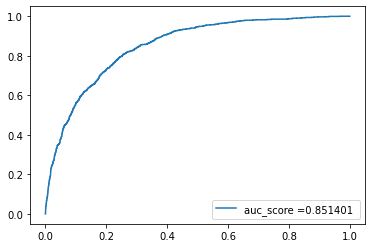

In [39]:
# Recievers Operating Characteristic curve:
def draw_roc(actual,prob):
    fpr,tpr,threshold = metrics.roc_curve(actual,prob,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,prob)
    plt.plot(fpr,tpr,label= 'auc_score =%f ' % auc_score)
    plt.legend(loc="lower right")

draw_roc(table.y_train,table.y_train_pred_prob)

In [40]:
# Now as we can see all the p values are significant but VIF for TotalCharges is 10.34, which is redundant. Hence we drop it.
X_train=X_train.drop('TotalCharges',axis=1)

In [41]:
# Fitting a Logistic Regression Model:
lr=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial()).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.9
Date:                Wed, 09 Jun 2021   Deviance:                       4039.8
Time:                        00:00:07   Pearson chi2:                 5.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.0479      0.318    -12.734      0.000      -4.671      -3.425
tenure                                   -0.9302      0.066    -14.154      0.000      -1.059      -0.801
PaperlessBilling                          0.3302      0.089      3.696      0.000       0.155       0.505
MonthlyCharges                           -0.9558      0.179     -5.332      0.000      -1.307      -0.604
SeniorCitizen                             0.4477      0.100      4.478      0.000       0.252       0.644
Contract_One year                        -0.7096      0.127     -5.601      0.000      -0.958      -0.461
Contract_Two year                        -1.3236      0.207     -6.402      0.000      -1.729      -0.918
PaymentMethod_Credit card (automatic)    -0.3859      0.113     -3.425      0.001      -0.607      -0.165
PaymentMethod_Mailed check               -0.3341      0.110     -3.043      0.002      -0.549      -0.119
MultipleLines_1                           0.4510      0.103      4.368      0.000       0.249       0.653
InternetService_Fiber optic               1.7989      0.204      8.828      0.000       1.400       2.198
DeviceProtection_0                        1.6099      0.207      7.759      0.000       1.203       2.017
DeviceProtection_1                        1.7597      0.241      7.310      0.000       1.288       2.232
StreamingTV_1                             0.6311      0.111      5.674      0.000       0.413       0.849
StreamingMovies_1                         0.5181      0.109      4.734      0.000       0.304       0.733
=========================================================================================================
"""

In [42]:
vif=pd.DataFrame()
vif['Columns']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Columns,VIF
9,InternetService_Fiber optic,4.09
2,MonthlyCharges,3.99
11,DeviceProtection_1,3.42
10,DeviceProtection_0,3.13
5,Contract_Two year,2.98
1,PaperlessBilling,2.93
13,StreamingMovies_1,2.82
12,StreamingTV_1,2.78
0,tenure,2.48
8,MultipleLines_1,2.26


In [43]:
table=pd.DataFrame()
table['customerID']=X_train.index
table['y_train']=y_train.values
table['y_train_pred_prob']=lr.predict(sm.add_constant(X_train)).values
table

,customerID,y_train,y_train_pred_prob
0,9342-VNIMQ,0,0.205535
1,0980-PVMRC,0,0.310295
2,0742-NXBGR,1,0.618135
3,9851-KIELU,1,0.600016
4,7295-JOMMD,1,0.733950
...,...,...,...
4917,3887-PBQAO,0,0.026619
4918,1729-VLAZJ,0,0.136344
4919,9782-LGXMC,0,0.056441
4920,2898-MRKPI,0,0.090871


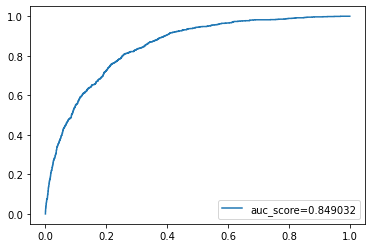

In [44]:
# Recievers Operating Characteristic curve:
def draw_roc(actual,prob):
    fpr,tpr,threshold = metrics.roc_curve(actual,prob,drop_intermediate=False) 
    auc_score=metrics.roc_auc_score(actual,prob)
    plt.plot(fpr,tpr,label='auc_score=%f' % auc_score)
    plt.legend(loc='lower right')

draw_roc(table.y_train,table.y_train_pred_prob) 

**As we can see that all the p-values are significant and also none of the variables are redundent. Hence we further check the accuracy of this model.**

In [45]:
table['y_train_pred']=table['y_train_pred_prob'].apply(lambda x:1 if x>0.5 else 0)
table

,customerID,y_train,y_train_pred_prob,y_train_pred
0,9342-VNIMQ,0,0.205535,0
1,0980-PVMRC,0,0.310295,0
2,0742-NXBGR,1,0.618135,1
3,9851-KIELU,1,0.600016,1
4,7295-JOMMD,1,0.733950,1
...,...,...,...,...
4917,3887-PBQAO,0,0.026619,0
4918,1729-VLAZJ,0,0.136344,0
4919,9782-LGXMC,0,0.056441,0
4920,2898-MRKPI,0,0.090871,0


In [46]:
conf_mat=metrics.confusion_matrix(table.y_train,table.y_train_pred)
conf_mat

array([[3279,  356],
       [ 589,  698]], dtype=int64)

In [47]:
accuracy=(conf_mat[0,0]+conf_mat[1,1])/sum(sum(conf_mat))
print('accuracy= %f'%accuracy)

sensitivity=conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
print('sensitivity= %f'%sensitivity)

specificity=conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('specificity= %f'%specificity)

accuracy= 0.808005
sensitivity= 0.542347
specificity= 0.902063


In [48]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for y in num:
    table[y]=table['y_train_pred_prob'].apply(lambda x:1 if x>y else 0)
table  

,customerID,y_train,y_train_pred_prob,y_train_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,9342-VNIMQ,0,0.205535,0,1,1,1,0,0,0,0,0,0,0,0
1,0980-PVMRC,0,0.310295,0,1,1,1,1,0,0,0,0,0,0,0
2,0742-NXBGR,1,0.618135,1,1,1,1,1,1,1,1,0,0,0,0
3,9851-KIELU,1,0.600016,1,1,1,1,1,1,1,1,0,0,0,0
4,7295-JOMMD,1,0.733950,1,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,3887-PBQAO,0,0.026619,0,1,0,0,0,0,0,0,0,0,0,0
4918,1729-VLAZJ,0,0.136344,0,1,1,0,0,0,0,0,0,0,0,0
4919,9782-LGXMC,0,0.056441,0,1,0,0,0,0,0,0,0,0,0,0
4920,2898-MRKPI,0,0.090871,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
metric_table=pd.DataFrame(columns=['Threshold','accuracy','sensitivity','specificity'])
for x in num:
    conf_mat=metrics.confusion_matrix(table.y_train,table[x])
    accuracy=(conf_mat[0,0]+conf_mat[1,1])/sum(sum(conf_mat))
    
    sensitivity=conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    
    specificity=conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])

    metric_table.loc[x]=[x,accuracy,sensitivity,specificity]
metric_table

,Threshold,accuracy,sensitivity,specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.616010,0.944056,0.499862
0.2,0.2,0.720236,0.849262,0.674553
0.3,0.3,0.772653,0.764569,0.775516
0.4,0.4,0.793377,0.654235,0.842641
0.5,0.5,0.808005,0.542347,0.902063
0.6,0.6,0.804145,0.405594,0.945254
0.7,0.7,0.779358,0.206682,0.982118
0.8,0.8,0.749492,0.048951,0.997524
0.9,0.9,0.738521,0.000000,1.000000


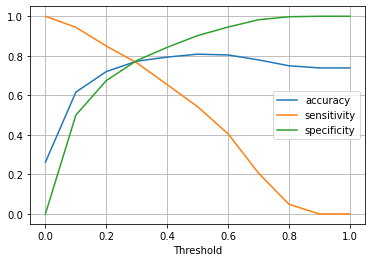

In [50]:
# Plot to find optimal cutoff
metric_table.plot.line(x='Threshold',y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show() 

**From the above plot it can be inferred that the optimum threshold is 0.3, hence 0.3 is taken as a cutoff probability**

**accuracy = 77.27%**

**sensitivity = 76.46%**

**specificity = 77.55%**

**Now we validate this model using the train dataset:**

## Model Validation on test data

In [51]:
y_test=df_test.pop('Churn')
X_test=df_test
X_test

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
customerID,,,,,,,,,,,,,,,,,,,,,
7567-ECMCM,24,1,79.85,2001.00,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
6771-XWBDM,57,1,104.50,5921.35,0,0,1,0,0,0,...,0,1,0,1,1,0,0,1,0,1
5356-KZCKT,58,1,24.45,1513.60,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6140-QNRQQ,1,1,71.55,71.55,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
9938-PRCVK,41,0,19.70,804.25,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968-FFVVH,63,0,68.80,4111.35,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
2368-GAKKQ,70,1,113.65,7939.25,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
5115-SQAAU,69,1,25.60,1673.40,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_test[var]=scaler.transform(X_test[var])
X_test

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1
customerID,,,,,,,,,,,,,,,,,,,,,
7567-ECMCM,-0.347623,1,0.499951,-0.128378,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
6771-XWBDM,0.999203,1,1.319685,1.600302,0,0,1,0,0,0,...,0,1,0,1,1,0,0,1,0,1
5356-KZCKT,1.040015,1,-1.342374,-0.343297,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6140-QNRQQ,-1.286319,1,0.223935,-0.979170,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
9938-PRCVK,0.346196,0,-1.500335,-0.656086,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968-FFVVH,1.244080,0,0.132483,0.802182,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
2368-GAKKQ,1.529770,1,1.623968,2.490097,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
5115-SQAAU,1.488957,1,-1.304131,-0.272833,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_test=X_test[X_train.columns]
X_test

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_1,InternetService_Fiber optic,DeviceProtection_0,DeviceProtection_1,StreamingTV_1,StreamingMovies_1
customerID,,,,,,,,,,,,,,
7567-ECMCM,-0.347623,1,0.499951,0,0,0,1,0,0,1,1,0,0,1
6771-XWBDM,0.999203,1,1.319685,0,0,0,1,0,1,1,0,1,1,1
5356-KZCKT,1.040015,1,-1.342374,0,0,1,1,0,1,0,0,0,0,0
6140-QNRQQ,-1.286319,1,0.223935,0,0,0,0,1,0,1,1,0,0,0
9938-PRCVK,0.346196,0,-1.500335,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968-FFVVH,1.244080,0,0.132483,0,1,0,0,0,1,0,0,1,0,0
2368-GAKKQ,1.529770,1,1.623968,0,0,1,0,0,1,1,0,1,1,1
5115-SQAAU,1.488957,1,-1.304131,0,0,1,0,0,1,0,0,0,0,0


In [54]:
y_test_pred_prob=lr.predict(sm.add_constant(X_test))
y_test_pred_prob

customerID
7567-ECMCM    0.417934
6771-XWBDM    0.243112
5356-KZCKT    0.009372
6140-QNRQQ    0.584040
9938-PRCVK    0.013933
                ...   
9968-FFVVH    0.021234
2368-GAKKQ    0.054279
5115-SQAAU    0.008759
6185-TASNN    0.448890
5846-ABOBJ    0.006069
Length: 2110, dtype: float64

In [55]:
y_test_pred=y_test_pred_prob.apply(lambda x:1 if x>0.3 else 0)
y_test_pred

customerID
7567-ECMCM    1
6771-XWBDM    0
5356-KZCKT    0
6140-QNRQQ    1
9938-PRCVK    0
             ..
9968-FFVVH    0
2368-GAKKQ    0
5115-SQAAU    0
6185-TASNN    1
5846-ABOBJ    0
Length: 2110, dtype: int64

In [56]:
conf_mat=metrics.confusion_matrix(y_test,y_test_pred)
conf_mat

array([[1148,  380],
       [ 161,  421]], dtype=int64)

In [57]:
accuracy=(conf_mat[0,0]+conf_mat[1,1])/sum(sum(conf_mat))
print('accuracy= %f'%accuracy)

sensitivity=conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
print('sensitivity= %f'%sensitivity)

specificity=conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('specificity= %f'%specificity)

accuracy= 0.743602
sensitivity= 0.723368
specificity= 0.751309


**On Train data:**               

**accuracy = 77.27%**                     
**sensitivity = 76.46%**       
**specificity = 77.55%**       

**On Test data:**

**accuracy = 74.36%**  
**sensitivity = 72.34%**  
**specificity = 75.13%**  

**Thus, the final model consists of the 14 variables. One can go ahead with this model and use it for predicting the customers who are likely to churn.**